# Task 1

# **Web scraping and analysis**

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called BeautifulSoup to collect the data from the web. Once you've collected your data and saved it into a local .csv file you should start with your analysis.



# Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [52]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os
#regex
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [53]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [54]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

reviews
0  ✅ Trip Verified |  I will never travel with Br...
1  ✅ Trip Verified |  I am already in Portugal so...
2  ✅ Trip Verified |  Terrible. Avoid this airlin...
3  ✅ Trip Verified |  Despite being a gold member...
4  Not Verified | Regarding the aircraft and seat...

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Data Collection

In this phase we will collect the customer ratings data from the airline quality website called Skytrax. We will collect data about airline ratings, seat ratings and lounge experience ratings from this website.

In [2]:
#create an empty list to collect all reviews
reviews  = []

#create an empty list to collect rating stars
stars = []

#create an empty list to collect date
date = []

#create an empty list to collect country the reviewer is from
country = []

In [5]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, "html5")
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    #date
    for item in soup.find_all("time"):
        date.append(item.text)
        
    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 30
Error on page 31
Error on page 32
Error on page 34
Error on page 34


In [6]:
#check the length of total reviews extracted
len(reviews)

3500

In [7]:
len(country)

3500

In [8]:
len(stars)

3535

In [9]:
len(date)

3500

In [10]:
len(country)

3500

In [11]:
len(stars)
print('len',len(stars))

len 3535


In [12]:
reviews = reviews[:3500]
stars = stars[:3500]
date = date[:3500]
country = country[:3500]

In [13]:
#create  a dataframe from these collected lists of data

df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country})

In [14]:
df

reviews   
0     ✅ Trip Verified |  I am already in Portugal so...  \
1     ✅ Trip Verified |  Terrible. Avoid this airlin...   
2     ✅ Trip Verified |  Despite being a gold member...   
3     Not Verified | Regarding the aircraft and seat...   
4     Not Verified | I travelled with British Airway...   
...                                                 ...   
3495  When we booked our holiday to Barbados I was r...   
3496  Travelling as a family of 4 (2 adults and 2 yo...   
3497  MIA-LHR in World Traveller on a 747-400. After...   
3498  Flew to Vegas on 8th May and dismayed at the s...   
3499  LCY-SNN-JFK-LCY BA001 and 004. Quick check in ...   

                              stars             date         country  
0     \n\t\t\t\t\t\t\t\t\t\t\t\t\t5     6th May 2023  United Kingdom  
1                                 1     6th May 2023  United Kingdom  
2                                 1     1st May 2023  United Kingdom  
3                                 2  28th April 2023  United Kingdom  
4                                 5  26th April 2023          Sweden  
...                             ...              ...             ...  
3495                              7    18th May 2014  United Kingdom  
3496                              9    17th May 2014  United Kingdom  
3497                             10    15th May 2014  United Kingdom  
3498                              5    15th May 2014  United Kingdom  
3499                              8    15th May 2014  United Kingdom  

[3500 rows x 4 columns]

In [16]:
import os

cwd = os.getcwd()
df.to_csv(cwd+ "/BA_reviews.csv")

# **==============================================================**

# Data Cleaning

**Now since we have extracted data from the website, it is not cleaned and ready to be analyzed yet. The reviews section will need to be cleaned for punctuations, spellings and other characters.**

In [18]:
cwd = os.getcwd()

df = pd.read_csv(cwd+"/BA_reviews.csv", index_col=0)

In [19]:
df.head()

reviews  stars             date   
0  ✅ Trip Verified |  I am already in Portugal so...    5.0     6th May 2023  \
1  ✅ Trip Verified |  Terrible. Avoid this airlin...    1.0     6th May 2023   
2  ✅ Trip Verified |  Despite being a gold member...    1.0     1st May 2023   
3  Not Verified | Regarding the aircraft and seat...    2.0  28th April 2023   
4  Not Verified | I travelled with British Airway...    5.0  26th April 2023   

          country  
0  United Kingdom  
1  United Kingdom  
2  United Kingdom  
3  United Kingdom  
4          Sweden

We will also create a column which mentions if the user is verified or not.

In [20]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [21]:
df['verified']

0        True
1        True
2        True
3       False
4       False
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Name: verified, Length: 3500, dtype: bool

# Cleaning Reviews

We will extract the column of reviews into a separate dataframe and clean it for semantic analysis

In [24]:
#for lemmatization of words we will use nltk library
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()


reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [25]:
# add the corpus to the original dataframe

df['corpus'] = corpus

In [26]:
df.head()

reviews  stars             date   
0  ✅ Trip Verified |  I am already in Portugal so...    5.0     6th May 2023  \
1  ✅ Trip Verified |  Terrible. Avoid this airlin...    1.0     6th May 2023   
2  ✅ Trip Verified |  Despite being a gold member...    1.0     1st May 2023   
3  Not Verified | Regarding the aircraft and seat...    2.0  28th April 2023   
4  Not Verified | I travelled with British Airway...    5.0  26th April 2023   

          country  verified                                             corpus  
0  United Kingdom      True  already portugal contacted today cancelled ret...  
1  United Kingdom      True  ble avoid airline becoming regular practice ca...  
2  United Kingdom      True  despite gold member british airway staff heath...  
3  United Kingdom     False  verified regarding aircraft seat business clas...  
4          Sweden     False  verified travelled british airway sweden los a...

# Cleaning/Fromat date

In [27]:
df.dtypes

reviews      object
stars       float64
date         object
country      object
verified       bool
corpus       object
dtype: object

In [31]:
from dateutil.parser import parse

df['date'] = df['date'].apply(lambda x: parse(x))

In [32]:
# convert the date to datetime format

df.date = pd.to_datetime(df.date, format="%d %B %Y")

In [33]:
df.date.head()

0   2023-05-06
1   2023-05-06
2   2023-05-01
3   2023-04-28
4   2023-04-26
Name: date, dtype: datetime64[ns]

# Cleaning ratings with stars

In [34]:
# check for unique values
df.stars.unique()

array([ 5.,  1.,  2., 10.,  3.,  4.,  9.,  7.,  8.,  6., nan])

In [35]:
df.stars.value_counts()

stars
1.0     775
2.0     394
3.0     389
8.0     351
10.0    310
7.0     301
9.0     297
5.0     261
4.0     236
6.0     181
Name: count, dtype: int64

In [37]:
# drop the rows where the value of ratings is None
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)

In [38]:
#check the unique values again
df.stars.unique()

array([ 5.,  1.,  2., 10.,  3.,  4.,  9.,  7.,  8.,  6., nan])

In [40]:
# drop rows with NaN values in the 'star' column
df = df.dropna(subset=['stars'])

# convert 'star' column from float to integer
df['stars'] = df['stars'].astype(np.int64)

C:\Users\SARVESH SURVE\AppData\Local\Temp\ipykernel_1324\1234928377.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stars'] = df['stars'].astype(np.int64)


In [41]:
df.stars.unique()

array([ 5,  1,  2, 10,  3,  4,  9,  7,  8,  6], dtype=int64)

# Check for null Values

In [42]:
df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     3492
                       True     False     False        3
Name: count, dtype: int64

In [43]:
df.country.isnull().value_counts()

country
False    3492
True        3
Name: count, dtype: int64

In [44]:
#drop the rows using index where the country value is null
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

C:\Users\SARVESH SURVE\AppData\Local\Temp\ipykernel_1324\3183524033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)


In [45]:
df.shape

(3492, 6)

In [46]:
#resetting the index
df.reset_index(drop=True)

reviews  stars       date   
0     ✅ Trip Verified |  I am already in Portugal so...      5 2023-05-06  \
1     ✅ Trip Verified |  Terrible. Avoid this airlin...      1 2023-05-06   
2     ✅ Trip Verified |  Despite being a gold member...      1 2023-05-01   
3     Not Verified | Regarding the aircraft and seat...      2 2023-04-28   
4     Not Verified | I travelled with British Airway...      5 2023-04-26   
...                                                 ...    ...        ...   
3487  When we booked our holiday to Barbados I was r...      7 2014-05-18   
3488  Travelling as a family of 4 (2 adults and 2 yo...      9 2014-05-17   
3489  MIA-LHR in World Traveller on a 747-400. After...     10 2014-05-15   
3490  Flew to Vegas on 8th May and dismayed at the s...      5 2014-05-15   
3491  LCY-SNN-JFK-LCY BA001 and 004. Quick check in ...      8 2014-05-15   

             country  verified   
0     United Kingdom      True  \
1     United Kingdom      True   
2     United Kingdom      True   
3     United Kingdom     False   
4             Sweden     False   
...              ...       ...   
3487  United Kingdom     False   
3488  United Kingdom     False   
3489  United Kingdom     False   
3490  United Kingdom     False   
3491  United Kingdom     False   

                                                 corpus  
0     already portugal contacted today cancelled ret...  
1     ble avoid airline becoming regular practice ca...  
2     despite gold member british airway staff heath...  
3     verified regarding aircraft seat business clas...  
4     verified travelled british airway sweden los a...  
...                                                 ...  
3487  booked holiday barbados really pleased see fly...  
3488  avelling family adult young child london bosto...  
3489  mia lhr world traveller flown consecutive leg ...  
3490  flew vega th may dismayed standard filthy seat...  
3491  lcy snn jfk lcy ba quick check fast track secu...  

[3492 rows x 6 columns]

Now our data is all cleaned and ready for data visualization and data analysis.

In [47]:
# export the cleaned data

df.to_csv(cwd + "/cleaned-BA-reviews.csv")

# **==============================================================================================================================**

# EDA

In [3]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

In [4]:
df.head()

reviews  stars        date   
0  ✅ Trip Verified |  I am already in Portugal so...      5  2023-05-06  \
1  ✅ Trip Verified |  Terrible. Avoid this airlin...      1  2023-05-06   
2  ✅ Trip Verified |  Despite being a gold member...      1  2023-05-01   
3  Not Verified | Regarding the aircraft and seat...      2  2023-04-28   
4  Not Verified | I travelled with British Airway...      5  2023-04-26   

          country  verified                                             corpus  
0  United Kingdom      True  already portugal contacted today cancelled ret...  
1  United Kingdom      True  ble avoid airline becoming regular practice ca...  
2  United Kingdom      True  despite gold member british airway staff heath...  
3  United Kingdom     False  verified regarding aircraft seat business clas...  
4          Sweden     False  verified travelled british airway sweden los a...

What is the average overall rating given for British Airways?

In [5]:
df.stars.mean()

4.790950744558992

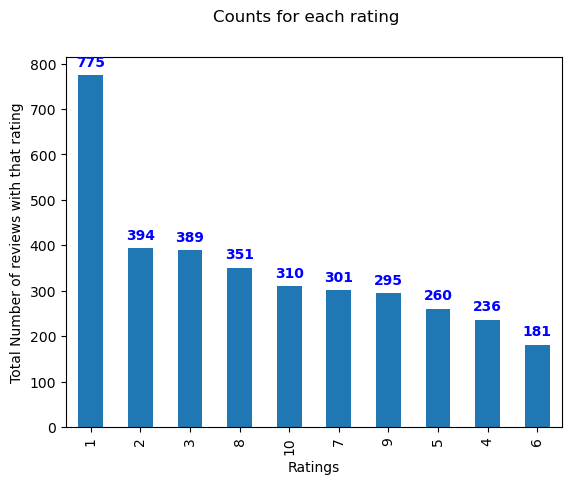

In [6]:
counts = df.stars.value_counts()
ax = counts.plot(kind="bar")

# Add labels to the barplot
for i, v in enumerate(counts):
    ax.text(i, v + 20, str(v), color='blue', fontweight='bold', ha='center')

plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each rating")
plt.show()

In [7]:
df.stars

0        5
1        1
2        1
3        2
4        5
        ..
3487     7
3488     9
3489    10
3490     5
3491     8
Name: stars, Length: 3492, dtype: int64

In [8]:
df_ratings = pd.DataFrame(df.stars.value_counts())

In [9]:
df_ratings.columns

Index(['count'], dtype='object')

In [10]:
pct_values = (df_ratings.iloc[:, 0].values / df_ratings.iloc[:, 0].values.sum() * 100).tolist()
pct_values = [round(x, 2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [11]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [12]:
df_ratings.columns

Index(['stars', 'count', 'pct_values'], dtype='object')

In [13]:
# renaming columns
df_ratings.rename(columns={'star':'Stars'}, inplace=True)

In [14]:
df_ratings.columns.values[1] = 'total_counts'

In [15]:
df_ratings.columns

Index(['stars', 'total_counts', 'pct_values'], dtype='object')

In [16]:
df_ratings

stars  total_counts  pct_values
0      1           775       22.19
1      2           394       11.28
2      3           389       11.14
3      8           351       10.05
4     10           310        8.88
5      7           301        8.62
6      9           295        8.45
7      5           260        7.45
8      4           236        6.76
9      6           181        5.18

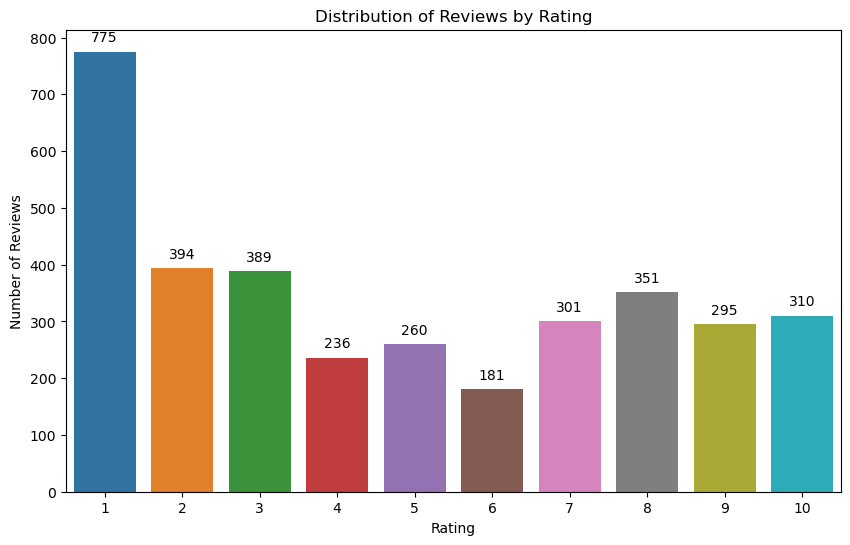

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=df_ratings['stars'], y=df_ratings['total_counts'], ax=ax)
ax.set_title('Distribution of Reviews by Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Reviews')

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')


In [23]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

69 unique countries


In [24]:
df.columns

Index(['reviews', 'stars', 'date', 'country', 'verified', 'corpus'], dtype='object')

# Which country most review comes from?

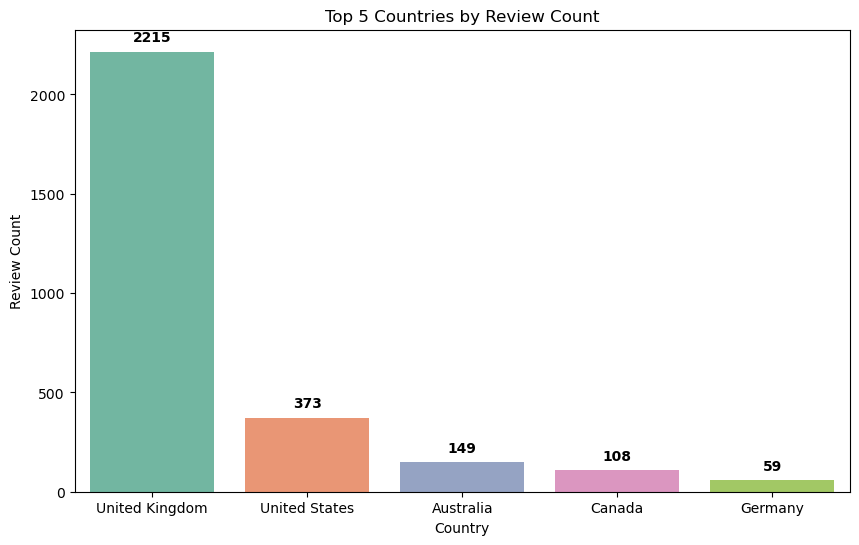

In [25]:
# Create a new DataFrame with the top 5 countries by review count
df_top_countries = df.groupby('country').count().nlargest(5, 'reviews').reset_index()[['country', 'reviews']]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='reviews', data=df_top_countries, palette='Set2')
plt.title('Top 5 Countries by Review Count')
plt.xlabel('Country')
plt.ylabel('Review Count')

# Add labels to the bars
for i, v in enumerate(df_top_countries['reviews']):
    plt.text(i, v+50, str(v), ha='center', fontweight='bold')

# Show the plot
plt.show()

Which country provided on average highest ratings?

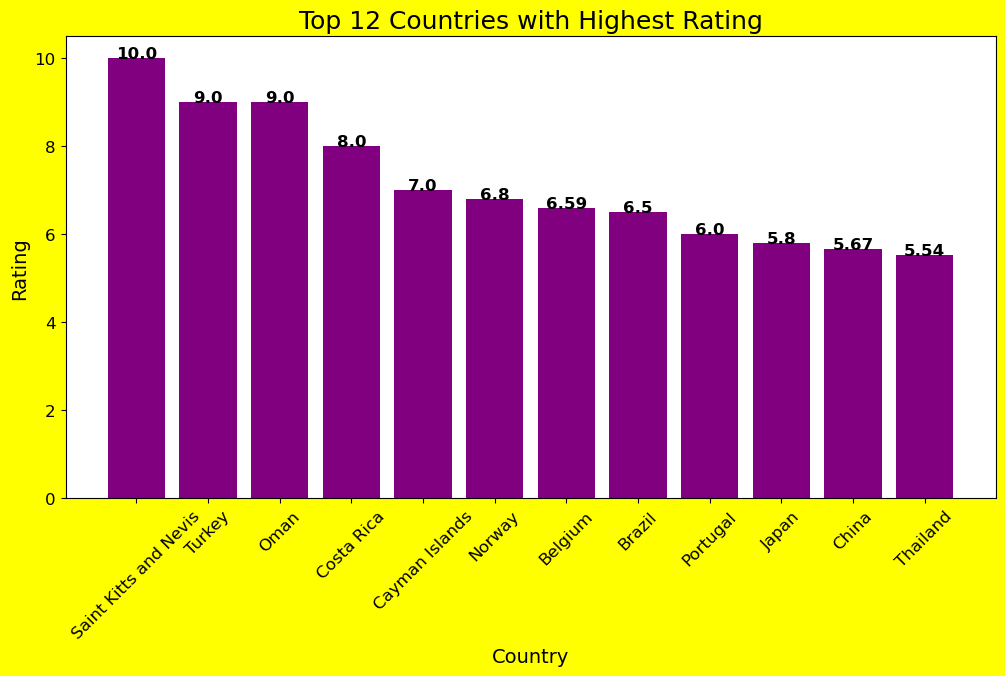

In [26]:
# Group the DataFrame by country and calculate the mean of the stars column
df_country_rating = df.groupby('country')['stars'].mean().sort_values(ascending=False).head(12)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6),facecolor = 'yellow')
ax.bar(df_country_rating.index, df_country_rating.values, color='purple')

# Set the chart title and axis labels
ax.set_title('Top 12 Countries with Highest Rating', fontsize=18)
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Rating', fontsize=14)

# Set the tick label font size
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Add labels to the plot
for i, v in enumerate(df_country_rating.values):
    ax.text(i, v, str(round(v, 2)), horizontalalignment='center', fontsize=12,fontweight='bold',color='black')

# Display the plot
plt.show()

# Time Series Analysis

In [27]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

In [28]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

**It can be seen that between April 2020 to May 2021 there has been a decline in reviews due to Covid Pandemic travel restrictions. Not much can be inferred at this point as the dates we have are the when the customers posted their reviews which does not take into account the actual flight date. Hence no particular significan trend is visible from the plot.**

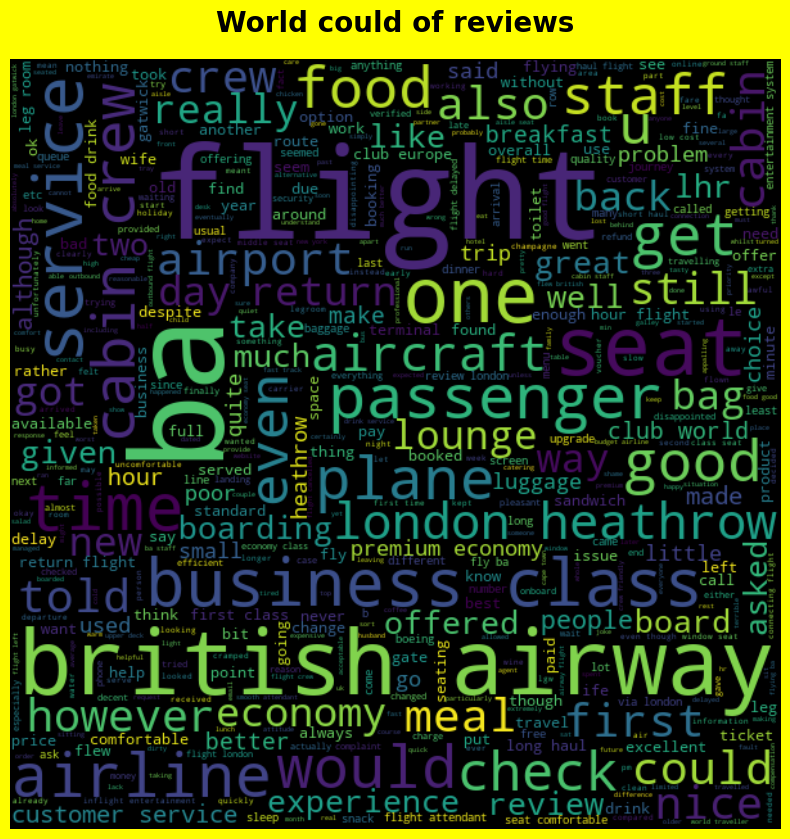

In [29]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10),facecolor='yellow')

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('World could of reviews',color='black',fontweight='bold', fontsize=20, pad=20)
plt.show()

There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.

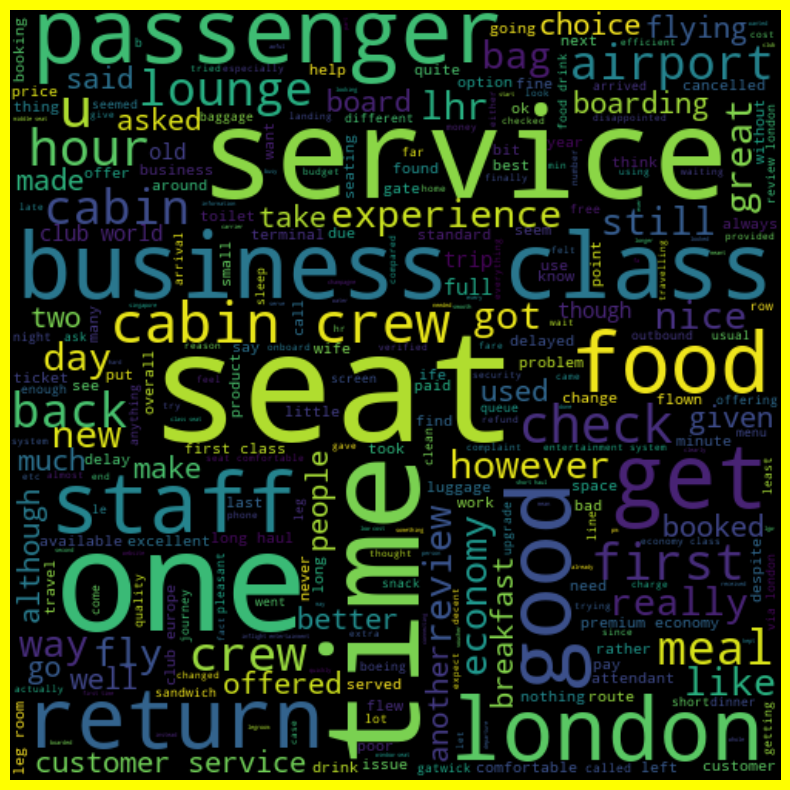

In [30]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10),facecolor='yellow')

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word Frequency

In [31]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'staff'),
  Text(10, 0, 'business'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'lounge'),
  Text(16, 0, 'return'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'experience')])

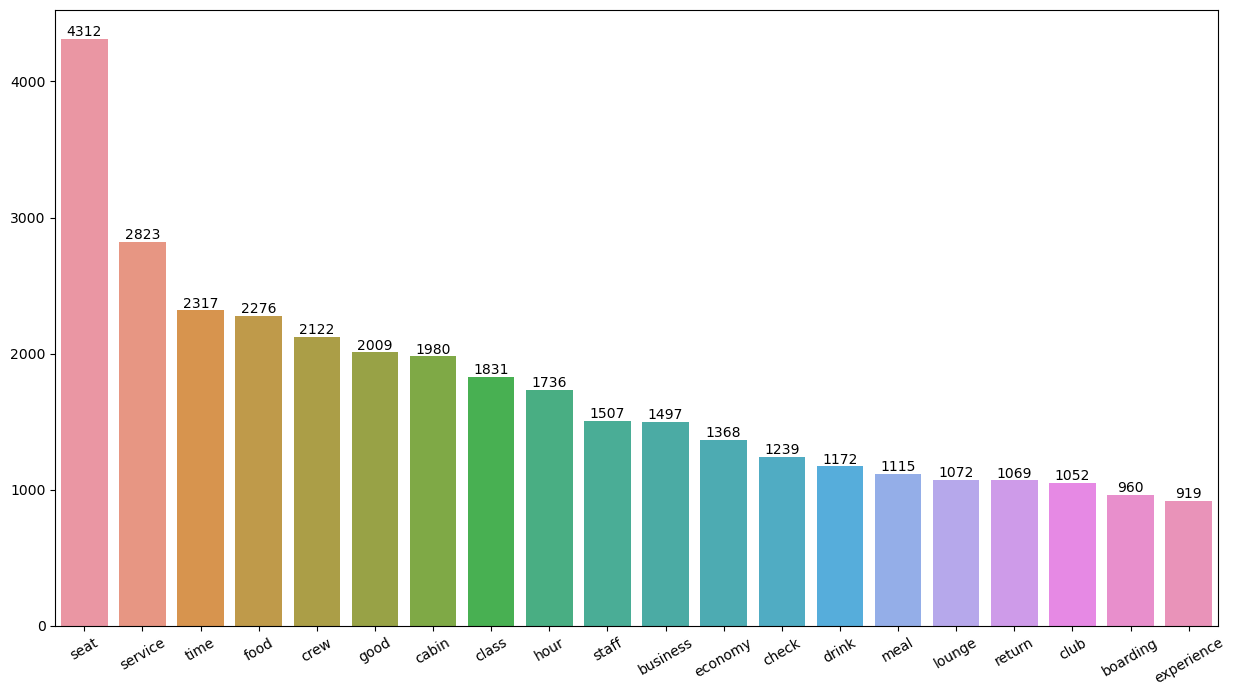

In [32]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

This gives us a glimpse of what customers are really talking about here. We see that Seat is most talked about the airline followed by "Service" and "food" which are all very important to customers in terms of service. However, we still do not know is how they are expressing about each of this service. To bring some significane to these terms we will use ngram plots to see if they are bad or good in experience.

# Word Frequency with N-gram

<AxesSubplot:>

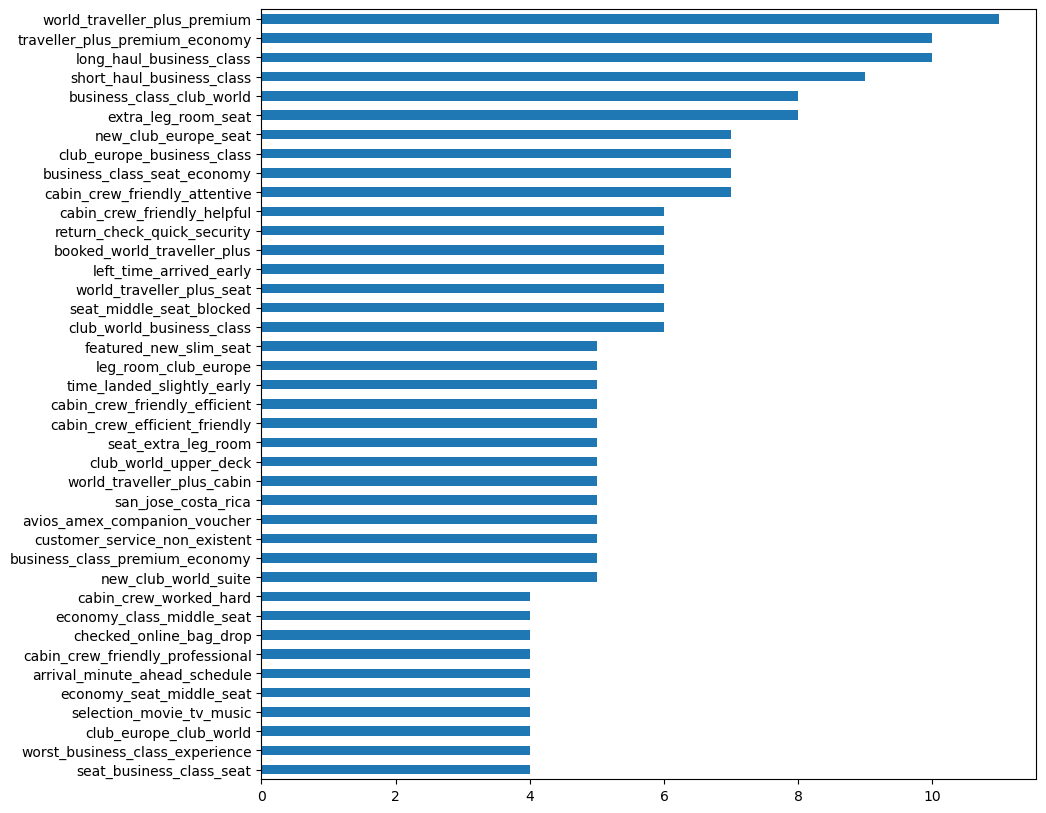

In [33]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways.

However, there is one another approach that we can try to find the word frequencies which will give us better idea. We will group the reviews based on ratings. Say, we assume ratigs 1-3 are bad reviews, 4-6 are average/good experience and 7-10 indicates a great experience.

In [34]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<AxesSubplot:>

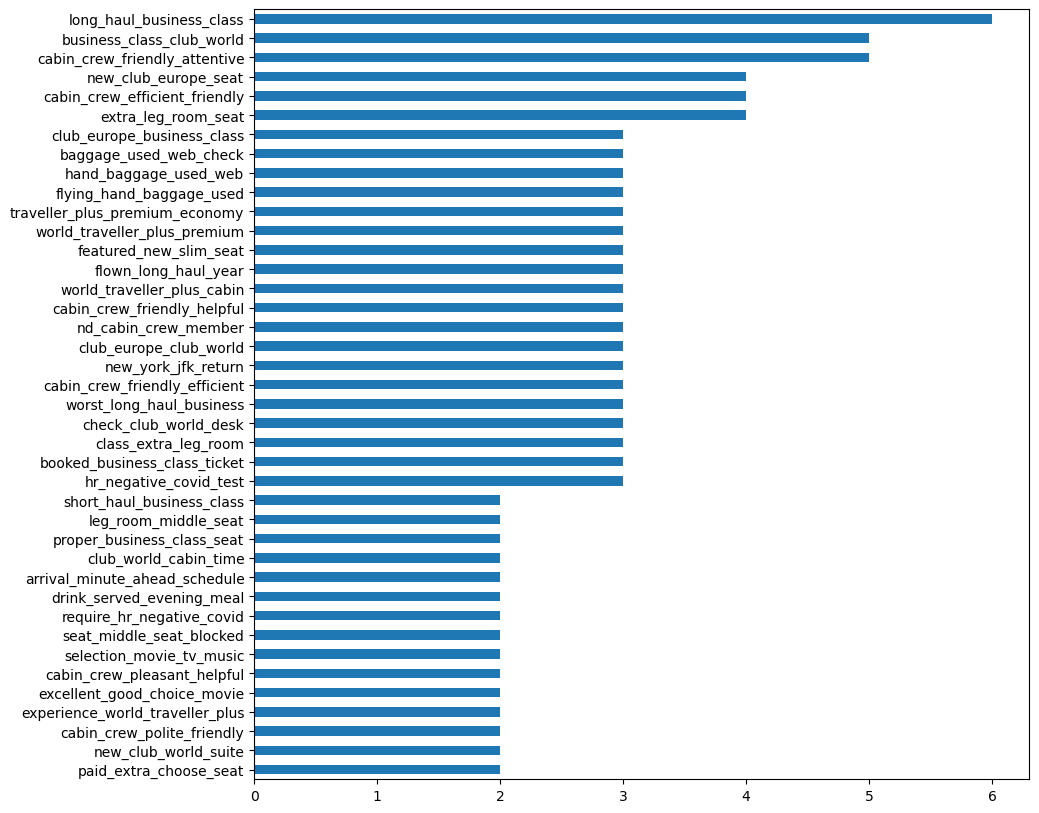

In [35]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<AxesSubplot:>

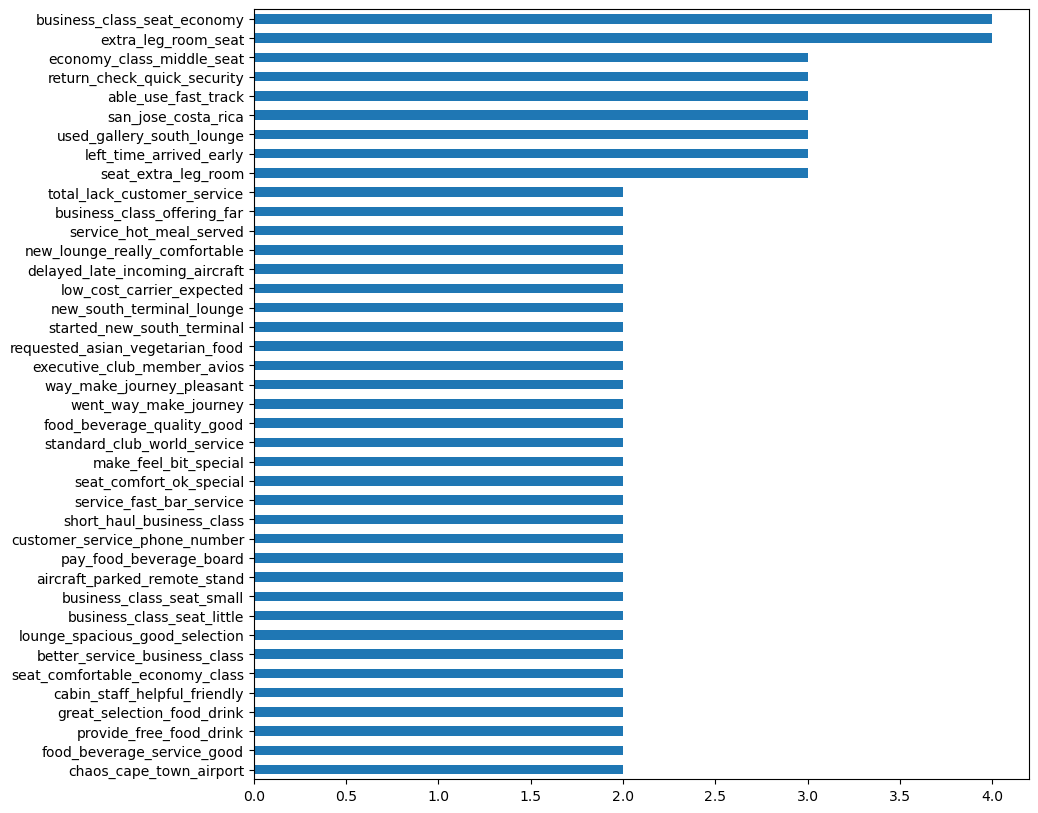

In [36]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<AxesSubplot:>

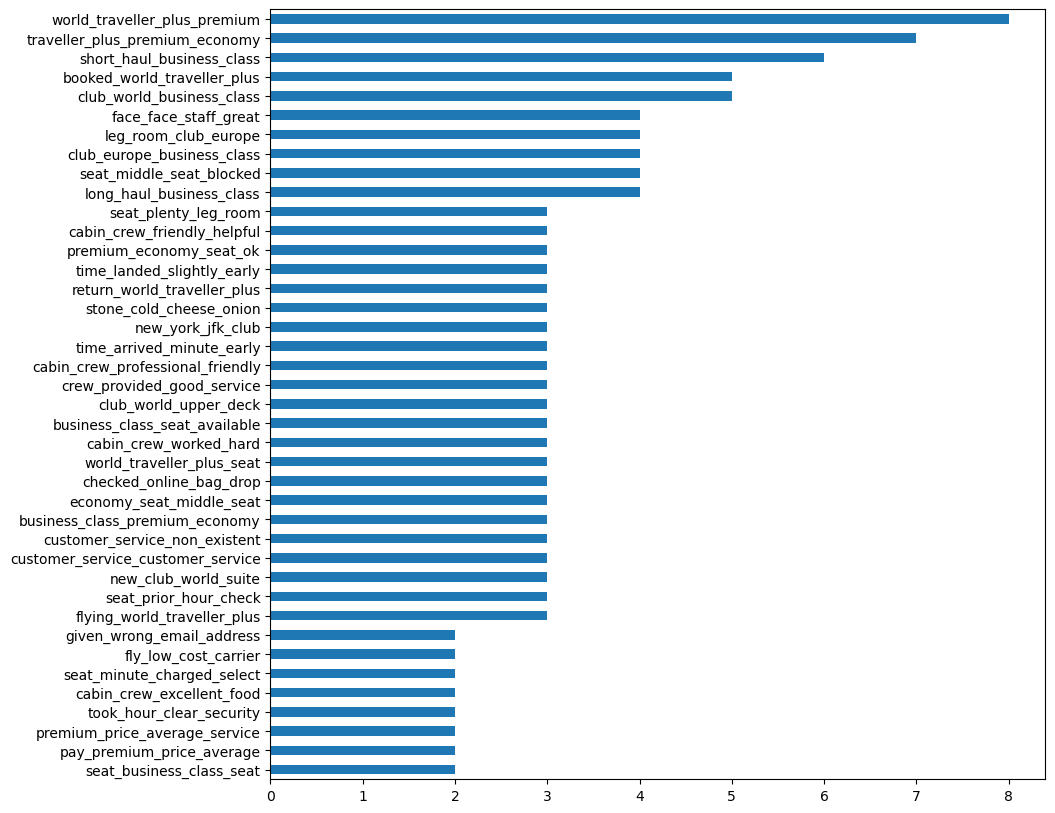

In [37]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

Now we will use textblob library to define if the text is negative or positive and to what extent

In [38]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [39]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2352 number of reviews between -0.2 and 0.2 polarity score
1362 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2352 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.

We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library.

In [40]:
# set a column Polarity with all 0 values initially
df['label'] = 0
    
for i in range(len(df.corpus)):
    
    text = TextBlob(df.corpus[i])
    score = text.sentiment.polarity
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

C:\Users\SARVESH SURVE\AppData\Local\Temp\ipykernel_21560\3278837232.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SARVESH SURVE\AppData\Local\Temp\ipykernel_21560\3278837232.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SARVESH SURVE\AppData\Local\Temp\ipykernel_21560\3278837232.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SARVESH SURVE\AppData\Local\Temp\ipykernel_21560\3278837232.py:1

In [41]:
df.label.value_counts()

label
 0    1537
 1     981
-1     974
Name: count, dtype: int64

# Topic Modeling with LDA

We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library.

In [42]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names()

In [43]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [44]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words   
0        flight          1034.1        flight          1302.2            ba  \
1          good           803.1            ba           870.2       airline   
2          seat           714.4        airway           569.0        flight   
3          crew           654.8       british           557.2       british   
4         cabin           546.3          told           549.5        airway   
5            ba           490.0      customer           531.3        london   
6           lhr           478.4          hour           517.4       service   
7       service           451.4         would           493.6          time   
8          food           399.7        london           451.2        review   
9          time           385.4           day           426.1          even   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights   
0           505.4        flight          2189.0           bag           271.9  \
1           391.5            ba           780.2         plane           159.4   
2           287.0          time           505.6        minute           158.4   
3           220.6         check           427.1        flight           154.6   
4           213.3          hour           422.9          time           121.0   
5           186.0       service           410.2      boarding           116.5   
6           170.5      heathrow           387.0     passenger           116.3   
7           159.8        london           369.2           one           102.5   
8           149.0          crew           321.5          gate            92.8   
9           140.5      boarding           282.3         check            88.2   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words   
0          seat          1501.1            ba          1290.4        flight  \
1        flight          1174.4          seat          1124.0          seat   
2            ba           612.1         class          1061.7          meal   
3          food           487.6      business           874.7          food   
4          good           487.5          food           868.2         drink   
5       service           459.4        flight           796.1       economy   
6         cabin           449.2       service           692.5         cabin   
7       economy           435.7          club           657.0        served   
8       british           434.8        lounge           646.1          hour   
9        london           430.2         cabin           545.3       service   

  Topic 7 weights  
0           449.5  
1           358.0  
2           309.7  
3           309.4  
4           278.1  
5           236.8  
6           229.3  
7           227.5  
8           213.3  
9           212.8

# Topic modeling with NMF

In [49]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.        , 0.05957705],
       [0.        , 0.04328721],
       [0.01743317, 0.0416005 ],
       ...,
       [0.03297031, 0.00753768],
       [0.03346815, 0.00419284],
       [0.03631186, 0.11637323]])

In [50]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [51]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0          seat            23.6        flight            22.4
1            ba            12.6            ba             7.6
2         class            10.1          hour             4.9
3          food             8.1          time             4.4
4      business             7.8        london             4.0
5       service             7.8        airway             3.7
6         cabin             7.6       service             3.7
7          good             7.1       british             3.6
8          crew             6.8         would             3.2
9       economy             6.3         staff             2.8